<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Lab 2 Data Visualization
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Exploring Data</div>

## Import libraries

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime

## Read data from csv file

In [267]:
df = pd.read_csv("./Data/data.csv", index_col=0)

In [268]:
df.head(10)

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday
0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,...,0,0,-161,0,0,NaN,NaN,NaN,NaN,1
1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
5,2009-01-01,6,35408,37135,31604,43,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
6,2009-01-01,7,34322,36844,30486,43,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
7,2009-01-01,8,33076,35678,29390,56,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
8,2009-01-01,9,31970,34635,28452,56,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
9,2009-01-01,10,31270,33934,27842,56,1403,0,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1


## Data Exploring

### How many rows and how many columns?

In [269]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"Your data has {num_rows} rows and {num_cols} columns")

Your data has 269182 rows and 22 columns


### What is the meaning of each row?

Each row represents information about a record of the electricity system in the UK.

### Are there duplicated rows?

In [270]:
num_duplicated_rows = df.duplicated().sum()
if num_duplicated_rows:
    print(f"Your data has {num_duplicated_rows} duplicated rows")
else:
    print("Your data has no duplicated row!")

Your data has no duplicated row!


### What is the meaning of each column?

In [271]:
print(df.columns)

Index(['settlement_date', 'settlement_period', 'nd', 'tsd',
       'england_wales_demand', 'embedded_wind_generation',
       'embedded_wind_capacity', 'embedded_solar_generation',
       'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping',
       'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow',
       'nemo_flow', 'nsl_flow', 'eleclink_flow', 'scottish_transfer',
       'viking_flow', 'is_holiday'],
      dtype='object')


- `SETTLEMET_DATA`: date in format dd/mm/yyyy
- `SETTLEMENT_PERIOD`: half hourly period for the historic outtunr occurred
- `ND` (National Demand). National Demand is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. National Demand is calculated as a sum of generation based on National Grid ESO operational generation metering. Measured in MW.
- `TSD` (Transmission System Demand). Transmission System Demand is equal to the ND plus the additional generation required to meet station load, pump storage pumping and interconnector exports. Measured in MW.
- `ENGLAND_WALES_DEMAND`. England and Wales Demand, as ND above but on an England and Wales basis. Measured in MW.
- `EMBEDDED_WIND_GENERATION`. This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. These wind farms are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high wind. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- `EMBEDDED_WIND_CAPACITY`. This is National Grid ESO’s best view of the installed embedded wind capacity in GB. This is based on publicly available information compiled from a variety of sources and is not the definitive view. It is consistent with the generation estimate provided above. Measured in MW
- `EMBEDDED_SOLAR_GENERATION`. This is an estimate of the GB solar generation from PV panels. These are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high radiation. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- `EMBEDDED_SOLAR_CAPACITY`. As embedded wind capacity above, but for solar generation. Measured in MW.
- `NON_BM_STOR` (Non-Balancing Mechanism SHort-Term Operating Reserve). For units that are not included in the ND generator definition. This can be in the form of generation or demand reduction. Measured in MW.
- `PUMP_STORAGE_PUMPING`. The demand due to pumping at hydro pump storage units; the -ve signifies pumping load.
- `IFA_FLOW` (IFA Interconnector Flow). The flow on on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `IFA2_FLOW` (IFA Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `MOYLE_FLOW` (Moyle Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `EAST_WEST_FLOW` (East West Innterconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `NEMO_FLOW` (Nemo Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `NSL_FLOW` (North Sea Link Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- `is_holiday`: 1 if the day is a holiday, 0 otherwise.

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
settlement_period,269182.0,24.500052,13.853721,1.0,12.25,24.0,36.00,50.0
nd,269182.0,31431.782582,7798.433766,13367.0,25187.00,30799.0,37147.00,59095.0
tsd,269182.0,32856.088802,7695.208408,0.0,26840.00,32047.0,38317.00,60147.0
england_wales_demand,269182.0,28604.959474,7065.922139,0.0,22922.25,28023.0,33826.00,53325.0
embedded_wind_generation,269182.0,1256.224473,959.483438,0.0,542.00,1004.0,1708.00,5587.0
embedded_wind_capacity,269182.0,4367.281393,1948.081425,1403.0,2092.00,4403.0,6488.00,6574.0
embedded_solar_generation,269182.0,840.243828,1650.661842,0.0,0.00,0.0,816.00,10329.0
embedded_solar_capacity,269182.0,8344.477339,5713.429105,0.0,1978.00,11105.0,13080.00,15954.0
non_bm_stor,269182.0,6.903448,39.855643,-24.0,0.00,0.0,0.00,893.0
pump_storage_pumping,269182.0,310.209249,534.658175,0.0,8.00,11.0,392.00,2019.0


### Correlation between columns

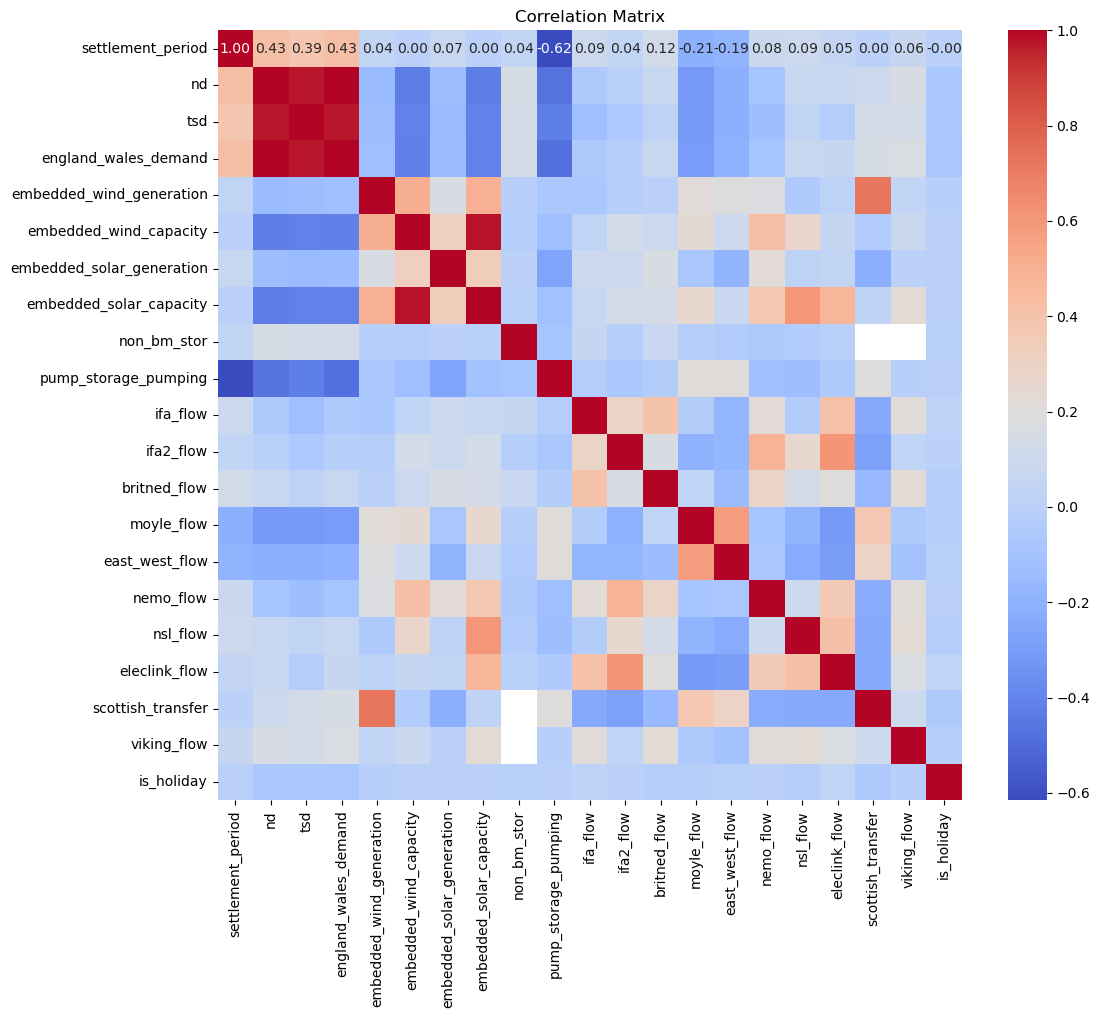

In [273]:
# exclude columns with unique values plot correlation matrix
df_corr = df[df.columns[~df.columns.isin(['settlement_date'])]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### What is the current data type of each column? Are there columns having inappropriate data types?

In [274]:
df.dtypes

settlement_date               object
settlement_period              int64
nd                             int64
tsd                            int64
england_wales_demand           int64
embedded_wind_generation       int64
embedded_wind_capacity         int64
embedded_solar_generation      int64
embedded_solar_capacity        int64
non_bm_stor                    int64
pump_storage_pumping           int64
ifa_flow                       int64
ifa2_flow                      int64
britned_flow                   int64
moyle_flow                     int64
east_west_flow                 int64
nemo_flow                      int64
nsl_flow                     float64
eleclink_flow                float64
scottish_transfer            float64
viking_flow                  float64
is_holiday                     int64
dtype: object

### Drop Rows that not essential for visualization

In [275]:
columns_to_drop = []
df.drop(columns=columns_to_drop,inplace=True)

### Convert type of columns

In [276]:
df.dtypes

settlement_date               object
settlement_period              int64
nd                             int64
tsd                            int64
england_wales_demand           int64
embedded_wind_generation       int64
embedded_wind_capacity         int64
embedded_solar_generation      int64
embedded_solar_capacity        int64
non_bm_stor                    int64
pump_storage_pumping           int64
ifa_flow                       int64
ifa2_flow                      int64
britned_flow                   int64
moyle_flow                     int64
east_west_flow                 int64
nemo_flow                      int64
nsl_flow                     float64
eleclink_flow                float64
scottish_transfer            float64
viking_flow                  float64
is_holiday                     int64
dtype: object

### Handle missing values

In [277]:
missing_ratio=(df.isnull().sum()/len(df)*100).round(2)
missing_ratio

settlement_date               0.00
settlement_period             0.00
nd                            0.00
tsd                           0.00
england_wales_demand          0.00
embedded_wind_generation      0.00
embedded_wind_capacity        0.00
embedded_solar_generation     0.00
embedded_solar_capacity       0.00
non_bm_stor                   0.00
pump_storage_pumping          0.00
ifa_flow                      0.00
ifa2_flow                     0.00
britned_flow                  0.00
moyle_flow                    0.00
east_west_flow                0.00
nemo_flow                     0.00
nsl_flow                     65.12
eleclink_flow                65.12
scottish_transfer            91.17
viking_flow                  91.17
is_holiday                    0.00
dtype: float64

Drop columns that has nan values

In [278]:
columns_to_drop = missing_ratio[missing_ratio > 0.0].index
df.drop(columns=columns_to_drop, inplace=True)
df.dtypes

settlement_date              object
settlement_period             int64
nd                            int64
tsd                           int64
england_wales_demand          int64
embedded_wind_generation      int64
embedded_wind_capacity        int64
embedded_solar_generation     int64
embedded_solar_capacity       int64
non_bm_stor                   int64
pump_storage_pumping          int64
ifa_flow                      int64
ifa2_flow                     int64
britned_flow                  int64
moyle_flow                    int64
east_west_flow                int64
nemo_flow                     int64
is_holiday                    int64
dtype: object

### Drop unnecessary rows
- Drop rows whose `SETTLEMENT_PERIOD` is not in the range of 1 to 48.

In [279]:
df.drop(index=df[df["settlement_period"] > 48].index, inplace=True)

### Create time column

Using `settlement_period` create a new column called `time` that represents the time of the day in hours. 48 periods in a day, each period is 30 minutes.

In [280]:
def convert_period_to_time(period, interval_minutes=30):
    # Calculate total minutes
    total_minutes = period * interval_minutes
    
    # Calculate hours and minutes
    hours = (total_minutes // 60) % 24
    minutes = total_minutes % 60
    
    time_of_day = f"{hours:02}:{minutes:02}"  # Format as HH:MM
    return time_of_day

In [281]:
df["settlement_time"] = df["settlement_period"].apply(convert_period_to_time)
df

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,settlement_time
0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1,00:30
1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1,01:00
2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1,01:30
3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1,02:00
4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1,02:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269177,2024-05-09,44,27768,29337,25177,320,6562,0,15905,0,7,1005,991,-335,-208,-519,999,0,22:00
269178,2024-05-09,45,26103,28207,23650,320,6562,0,15905,0,12,1005,991,-915,-152,-525,998,0,22:30
269179,2024-05-09,46,24969,27012,22642,320,6562,0,15905,0,12,1005,991,-947,-178,-406,998,0,23:00
269180,2024-05-09,47,23386,25510,21246,322,6562,0,15905,0,12,1005,991,-1014,-237,-361,742,0,23:30


### Combine date and time columns

In [282]:
df["datetime"] = pd.to_datetime(df["settlement_date"] + " " + df["settlement_time"])
df.drop(columns=["settlement_period"], inplace=True)
df

,settlement_date,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,settlement_time,datetime
0,2009-01-01,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1,00:30,2009-01-01 00:30:00
1,2009-01-01,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1,01:00,2009-01-01 01:00:00
2,2009-01-01,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1,01:30,2009-01-01 01:30:00
3,2009-01-01,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1,02:00,2009-01-01 02:00:00
4,2009-01-01,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1,02:30,2009-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269177,2024-05-09,27768,29337,25177,320,6562,0,15905,0,7,1005,991,-335,-208,-519,999,0,22:00,2024-05-09 22:00:00
269178,2024-05-09,26103,28207,23650,320,6562,0,15905,0,12,1005,991,-915,-152,-525,998,0,22:30,2024-05-09 22:30:00
269179,2024-05-09,24969,27012,22642,320,6562,0,15905,0,12,1005,991,-947,-178,-406,998,0,23:00,2024-05-09 23:00:00
269180,2024-05-09,23386,25510,21246,322,6562,0,15905,0,12,1005,991,-1014,-237,-361,742,0,23:30,2024-05-09 23:30:00


### Resort entries by date and time

Sort entries by date and time to make sure there are no misplaced entries.

In [283]:
df.sort_values(by=["datetime"], inplace=True)

### Handle missing value

#### Inspecting the reamining columns to look for wrong data

In [284]:
missing_ratio=(df.isnull().sum()/len(df)*100).round(2)
missing_ratio

settlement_date              0.0
nd                           0.0
tsd                          0.0
england_wales_demand         0.0
embedded_wind_generation     0.0
embedded_wind_capacity       0.0
embedded_solar_generation    0.0
embedded_solar_capacity      0.0
non_bm_stor                  0.0
pump_storage_pumping         0.0
ifa_flow                     0.0
ifa2_flow                    0.0
britned_flow                 0.0
moyle_flow                   0.0
east_west_flow               0.0
nemo_flow                    0.0
is_holiday                   0.0
settlement_time              0.0
datetime                     0.0
dtype: float64

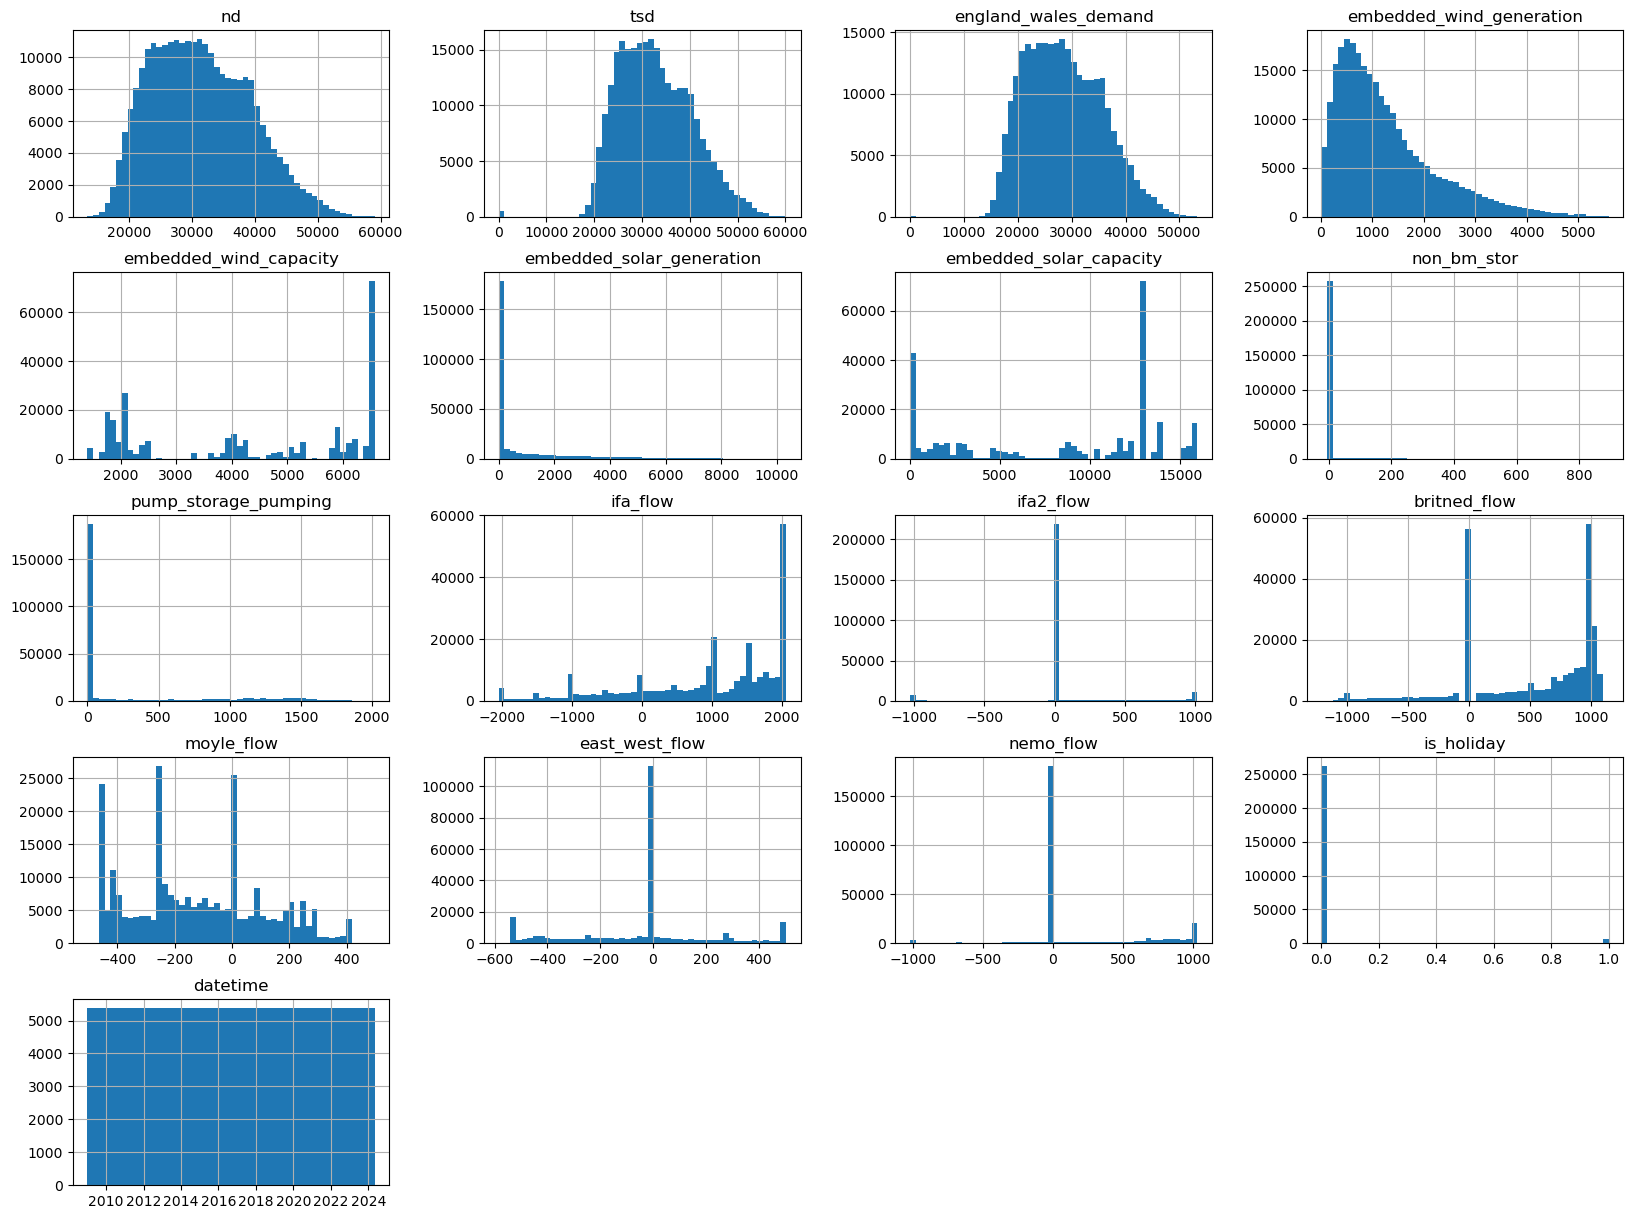

In [285]:
# plot histogram for each numeric column
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

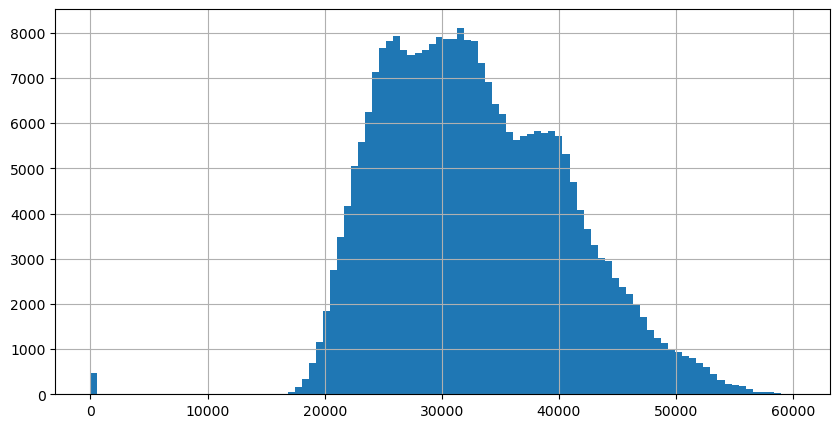

In [286]:
df['tsd'].hist(bins = 100, figsize = (10, 5))

In [287]:
# fill records whose tsd value is zero with the mean of the tsd column of same settlement period
df['tsd'] = df.groupby('settlement_time')['tsd'].transform(lambda x: x.replace(0, x.mean()))

<Axes: >

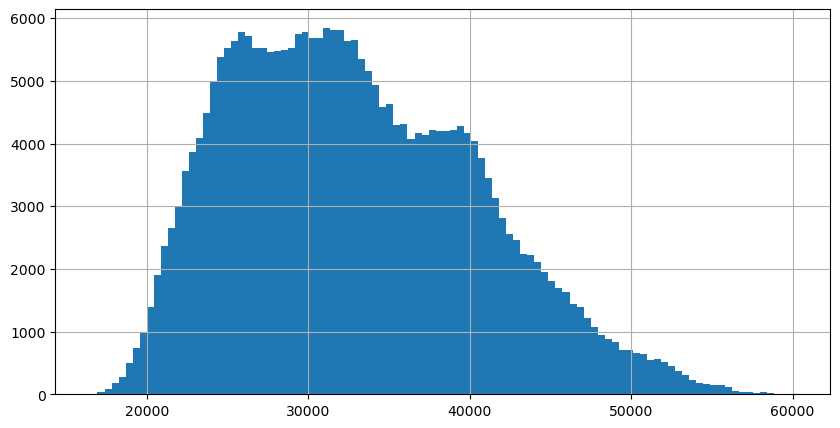

In [288]:
df['tsd'].hist(bins = 100, figsize = (10, 5))

### Save cleaned data to CSV file

In [289]:
df.to_csv("./Data/data_processed.csv", index=False)